In [1]:
from convcrf.convcrf import GaussCRF
from torch.utils.data import Dataset, DataLoader
import os, cv2, numpy as np
import torch
from yolocrf import trainset, testset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
outputs = []

inputs, target = testset.__getitem__(1)
mask, hmap, target = torch.unsqueeze(inputs[0],0),torch.unsqueeze(inputs[1],0),torch.unsqueeze(target,0)
ckpts = ['new.pt', 'new1.5.pt', 'new2.pt', 'new3.pt', 'harrier-26.pt', 'crf-604.pt', 'crf_custom_loss.pt', 'bcewll-3.pt', 'bcewll-3-allch.pt', 'bcewll-1-allch-5unary.pt', 'bcewll-1-allch-3gfilter.pt', 'bcewll-1-allch-nomask.pt']
for i in ckpts[:4]:
    crf = torch.load('checkpoints/' + i)
    # crf = torch.load('checkpoints/harrier-26.pt')
    output = crf(mask.to('cuda:0').float(), hmap.to('cuda:0').float())
    outputs.append(output[0,0,:,:].cpu().detach().numpy())

In [12]:
outputs[3].min(), outputs[3].max(), outputs[3].mean()

(-2.160275, -0.3028019, -1.1499674)

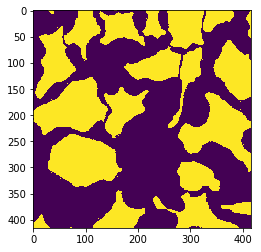

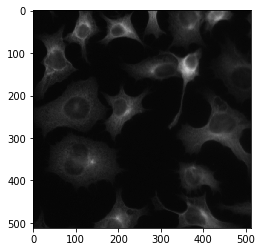

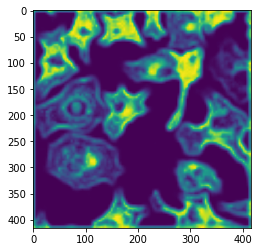

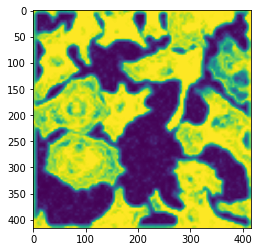

In [24]:
img_orig = cv2.imread('neuroblastoma/110085.jpg')
plt.imshow(target.detach().numpy()[0,:,:])
plt.figure()
plt.imshow(img_orig)

plt.figure()
plt.imshow(outputs[0])
plt.figure()
plt.imshow(outputs[3])